Classification and Regression Trees (CART) are a set of supervised learning models used for problems involving classification and regression. In this chapter, you'll be introduced to the CART algorithm.

# 1- Decision tree for classification


video

# 2- Train your first classification tree


<p>In this exercise you&apos;ll work with the <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data">Wisconsin Breast Cancer Dataset</a> from the UCI machine learning repository. You&apos;ll predict whether a tumor is malignant or benign based on two features: the mean radius of the tumor (<code>radius_mean</code>) and its mean number of concave points (<code>concave points_mean</code>).</p>
<p>The dataset is already loaded in your workspace and is split into 80% train and 20% test. The feature matrices are assigned to <code>X_train</code> and <code>X_test</code>, while the arrays of labels are assigned to <code>y_train</code> and <code>y_test</code> where class 1 corresponds to a malignant tumor and class 0 corresponds to a benign tumor. To obtain reproducible results, we also defined a variable called <code>SEED</code> which is set to 1.</p>

<ul>
<li><p>Import <code>DecisionTreeClassifier</code> from <code>sklearn.tree</code>.</p></li>
<li><p>Instantiate a <code>DecisionTreeClassifier</code> <code>dt</code> of maximum depth equal to 6. </p></li>
<li><p>Fit <code>dt</code> to the training set.</p></li>
<li><p>Predict the test set labels and assign the result to <code>y_pred</code>.</p></li>
</ul>

In [51]:
# First I will import the dataset and split data, and get the two features

import pandas as pd
from sklearn.model_selection import train_test_split

cancer=pd.read_csv('datasets/wbc.csv')

cancer=cancer.replace('M', 1)
cancer=cancer.replace('B', 0)

#we need the radius_mean, concave points_mean as features 
# and need diagnosis as predictor varaible 

X=cancer[['radius_mean','concave points_mean']]
y=cancer['diagnosis']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20)

SEED=1

In [52]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth =6, random_state=SEED)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[1 0 1 0 0]


# 3- Evaluate the classification tree


<p>Now that you&apos;ve fit your first classification tree, it&apos;s time to evaluate its performance on the test set. You&apos;ll do so using the accuracy metric which corresponds to the fraction of correct predictions made on the test set.</p>
<p>The trained model <code>dt</code> from the previous exercise is loaded in your workspace along with the test set features matrix <code>X_test</code> and the array of labels <code>y_test</code>.</p>

<ul>
<li><p>Import the function <code>accuracy_score</code> from <code>sklearn.metrics</code>.</p></li>
<li><p>Predict the test set labels and assign the obtained array to <code>y_pred</code>.</p></li>
<li><p>Evaluate the test set accuracy score of <code>dt</code> by calling <code>accuracy_score()</code> and assign the value to <code>acc</code>.</p></li>
</ul>

In [53]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.83


# 4- Logistic regression vs classification tree

<p>A classification tree divides the feature space into <strong>rectangular regions</strong>. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.</p>
<p>We have written a custom function called <code>plot_labeled_decision_regions()</code> that you can use to plot the decision regions of a list containing two trained classifiers. You can type <code>help(plot_labeled_decision_regions)</code> in the IPython shell to learn more about this function. </p>
<p><code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code>, the model <code>dt</code> that you&apos;ve trained in an earlier <a href="https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/classification-and-regression-trees?ex=2">exercise</a> , as well as the function <code>plot_labeled_decision_regions()</code> are available in your workspace.</p>

<ul>
<li><p>Import  <code>LogisticRegression</code> from <code>sklearn.linear_model</code>.</p></li>
<li><p>Instantiate a <code>LogisticRegression</code> model and assign it to <code>logreg</code>.</p></li>
<li><p>Fit <code>logreg</code> to the training set.</p></li>
<li><p>Review the plot generated by <code>plot_labeled_decision_regions()</code>.</p></li>
</ul>

In [54]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

# Define a list called clfs containing the two classifiers logreg and dt
clfs = [logreg, dt]

# Review the decision regions of the two classifiers
#plot_labeled_decision_regions(X_test, y_test, clfs)

#I Do not used this defined function,
#beacues it is defined on the server of DataCamp,
#So i will use plot_decision_regions, from mlxtend.plotting

C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [56]:
#convert X to Numpy.array
X=X.values

#convert y to numpy.array
y=y.to_numpy()

C:\Users\MohammedTaysser\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


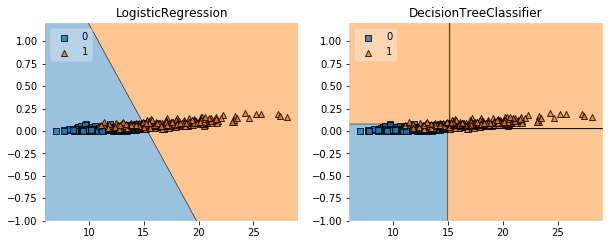

In [57]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['LogisticRegression', 'DecisionTreeClassifier']
for clf, lab, grd in zip([logreg, dt],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

for info about plots, <a href="http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/#plotting-decision-regions">Plotting Decision Regions</a>

In [58]:
# THe output of 
#plot_labeled_decision_regions(X_test, y_test, clfs)



# 5- Classification tree Learning


video

# 6- Growing a classification tree


In the video, you saw that the growth of an unconstrained classification tree followed a few simple rules. Which of the following is not one of these rules?

# 7- Using entropy as a criterion


<p>In this exercise, you&apos;ll train a classification tree on the Wisconsin Breast Cancer dataset using entropy as an information criterion. You&apos;ll do so using all the 30 features in the dataset, which is split into 80% train and 20% test.</p>
<p><code>X_train</code> as well as the array of labels <code>y_train</code> are available in your workspace.</p>

<ul>
<li><p>Import <code>DecisionTreeClassifier</code> from <code>sklearn.tree</code>.</p></li>
<li><p>Instantiate a <code>DecisionTreeClassifier</code> <code>dt_entropy</code> with a maximum depth of 8.</p></li>
<li><p>Set the information criterion to <code>&apos;entropy&apos;</code>. </p></li>
<li><p>Fit <code>dt_entropy</code> on the training set.</p></li>
</ul>

In [71]:
cancer=pd.read_csv('datasets/wbc.csv')

cancer=cancer.replace('M', 1)
cancer=cancer.replace('B', 0)

#we need all features except unnessaray features id, Unnamed: 32
# and need diagnosis as predictor varaible 

X=cancer.drop(['id','diagnosis','Unnamed: 32'], axis=1)
y=cancer['diagnosis']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20)

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [75]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

# 8- Entropy vs Gini index


<p>In this exercise you&apos;ll compare the test set accuracy of <code>dt_entropy</code> to the accuracy of another tree named <code>dt_gini</code>. The tree <code>dt_gini</code> was trained on the same dataset using the same parameters except for the information criterion which was set to the gini index using the keyword <code>&apos;gini&apos;</code>.</p>
<p><code>X_test</code>, <code>y_test</code>, <code>dt_entropy</code>, as well as <code>accuracy_gini</code> which corresponds to the test set accuracy achieved by <code>dt_gini</code> are available in your workspace.</p>

<ul>
<li>Import <code>accuracy_score</code> from <code>sklearn.metrics</code>.</li>
<li>Predict the test set labels of <code>dt_entropy</code> and assign the result to <code>y_pred</code>.</li>
<li>Evaluate the test set accuracy of <code>dt_entropy</code> and assign the result to <code>accuracy_entropy</code>.</li>
<li>Review <code>accuracy_entropy</code> and <code>accuracy_gini</code>.</li>
</ul>

In [77]:
# I will train data with 'gini'


# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_pred, y_test)

In [78]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_pred, y_test)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using entropy:  0.9649122807017544
Accuracy achieved by using the gini index:  0.9736842105263158


Nice work! Notice how the two models achieve exactly the same accuracy. Most of the time, the gini index and entropy lead to the same results. The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.

# 9- Decision tree for regression


video

# 10- Train your first regression tree


<p>In this exercise, you&apos;ll train a regression tree to predict the <code>mpg</code> (miles per gallon) consumption of cars in the <a href="https://www.kaggle.com/uciml/autompg-dataset">auto-mpg dataset</a> using all the six available features.</p>
<p>The dataset is processed for you and is split to 80% train and 20% test. The features matrix <code>X_train</code> and the array <code>y_train</code> are available in your workspace.</p>

In [106]:
#preprocessing

auto=pd.read_csv('datasets/auto.csv')

auto.head()


,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [107]:
#Creating dummy variables, for origin colum

# Create dummy variables: df_region
origins = pd.get_dummies(auto)

# Print the columns of df_region
print(origins.columns)

# Create dummy variables with drop_first=True: df_region
auto_origins = pd.get_dummies(auto, drop_first=True)

# Print the new columns of df_region
print(auto_origins.columns)

auto_origins.head()

Index(['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia',
       'origin_Europe', 'origin_US'],
      dtype='object')
Index(['mpg', 'displ', 'hp', 'weight', 'accel', 'size', 'origin_Europe',
       'origin_US'],
      dtype='object')


,mpg,displ,hp,weight,accel,size,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


In [108]:
X=auto_origins.drop('mpg', axis=1)
y=auto_origins['mpg']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20)

<ul>
<li>Import <code>DecisionTreeRegressor</code>  from <code>sklearn.tree</code>.</li>
<li>Instantiate a  <code>DecisionTreeRegressor</code> <code>dt</code> with maximum depth 8 and <code>min_samples_leaf</code> set to 0.13.</li>
<li>Fit <code>dt</code> to the training set.</li>
</ul>

In [109]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.13,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=3, splitter='best')

# 11- Evaluate the regression tree


<p>In this exercise, you will evaluate the test set performance of <code>dt</code> using the  Root Mean Squared Error (RMSE) metric. The RMSE of a model measures, on average, how much the model&apos;s predictions differ from the actual labels. The RMSE of a model can be obtained by computing the square root of the model&apos;s Mean Squared Error (MSE).</p>
<p>The features matrix <code>X_test</code>, the array <code>y_test</code>, as well as the decision tree regressor <code>dt</code> that you trained in the previous exercise are available in your workspace.</p>

<ul>
<li>Import the function <code>mean_squared_error</code> as <code>MSE</code>  from <code>sklearn.metrics</code>.</li>
<li>Predict the test set labels and assign the output to <code>y_pred</code>.</li>
<li>Compute the test set MSE by calling <code>MSE</code> and assign the result to <code>mse_dt</code>.</li>
<li>Compute the test set RMSE and assign it to <code>rmse_dt</code>.</li>
</ul>

In [110]:
# Import mean_squared_error from sklearn.metrics as MSE
from sklearn.metrics import mean_squared_error as MSE

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_pred, y_test)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.44


# 12- Linear regression vs regression tree


<p>In this exercise, you&apos;ll compare the test set RMSE of <code>dt</code> to that achieved by a linear regression model. We have already instantiated a linear regression model <code>lr</code> and trained it on the same dataset as <code>dt</code>. </p>
<p>The features matrix <code>X_test</code>, the array of labels  <code>y_test</code>, the trained linear regression model <code>lr</code>, <code>mean_squared_error</code> function which was imported under the alias <code>MSE</code> and <code>rmse_dt</code> from the previous exercise are available in your workspace.</p>

In [111]:
# First I will train data with LinearRegression, To solve the exercise

from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<ul>
<li><p>Predict test set labels using the linear regression model (<code>lr</code>) and assign the result to <code>y_pred_lr</code>.</p></li>
<li><p>Compute the test set MSE and assign the result to <code>mse_lr</code>. </p></li>
<li><p>Compute the test set RMSE and assign the result to <code>rmse_lr</code>.</p></li>
</ul>

In [112]:
# Predict test set labels 
y_pred_lr = lr.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_pred_lr, y_test)

# Compute rmse_lr
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 4.15
Regression Tree test set RMSE: 4.44
